In [1]:
#importing libraries
import pandas as pd
import numpy as np 
%matplotlib inline
import seaborn as sns 
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

In [2]:
#importing the data
df=pd.read_csv(r'C:\\Users\\strog\\Documents\\Google Dr Backup\\Google Dr Glasgow DA Master\\Final Project\\scripts\\subset.csv', 
                      sep=',')

In [4]:
#printing main info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254887 entries, 0 to 254886
Data columns (total 23 columns):
Num_Acc              254887 non-null int64
moving_obst_hit      254887 non-null object
shock_point          254887 non-null object
severity             254887 non-null object
gender               254887 non-null object
journey_reason       254887 non-null object
secu_equipment       254887 non-null object
acc_year             254887 non-null int64
acc_hour             254887 non-null int64
lighting             254887 non-null object
built_up_area        254887 non-null object
junction_type        254887 non-null object
atmospheric_cond     254887 non-null object
road_type            254887 non-null object
traffic_type         254887 non-null object
lanes_number         254887 non-null int64
road_slope           254887 non-null object
road_shape           254887 non-null object
lane_width           254887 non-null int64
surface_state        254887 non-null object
acc_place_on_r

### Checking outliers

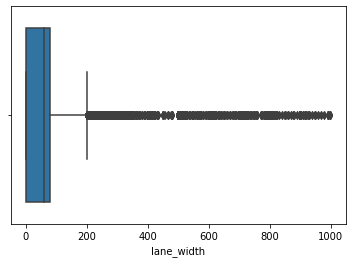

In [3]:
#box plot for lane_width variable
sns.boxplot(x=df['lane_width'])

In [4]:
#counting how many observations have lane_width missing
df[df['lane_width']==0].count()
#the data is missing in 32% of cases - we will drop this variable

Num_Acc              81049
moving_obst_hit      81049
shock_point          81049
severity             81049
gender               81049
journey_reason       81049
secu_equipment       81049
acc_year             81049
acc_hour             81049
lighting             81049
built_up_area        81049
junction_type        81049
atmospheric_cond     81049
road_type            81049
traffic_type         81049
lanes_number         81049
road_slope           81049
road_shape           81049
lane_width           81049
surface_state        81049
acc_place_on_road    81049
driver_age           81049
speed                81049
dtype: int64

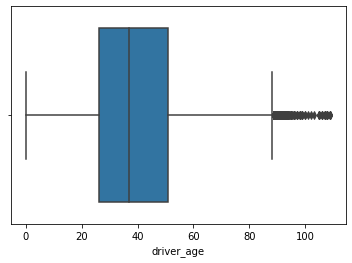

In [5]:
#box plot for driver_age variable
sns.boxplot(x=df['driver_age'])

In [6]:
#showing mean, standard deviation and percentiles
df.describe()

,Num_Acc,acc_year,acc_hour,lanes_number,lane_width,driver_age,speed
count,2.548870e+05,254887.000000,254887.000000,254887.000000,254887.000000,254887.000000,254887.000000
mean,2.010424e+11,2010.423796,14.055425,2.099938,58.670018,40.463602,66.952744
std,3.852347e+08,3.852402,5.033674,1.527540,65.842811,16.660870,23.879751
min,2.005000e+11,2005.000000,1.000000,0.000000,0.000000,0.000000,50.000000
25%,2.007000e+11,2007.000000,10.000000,2.000000,0.000000,26.000000,50.000000
50%,2.010000e+11,2010.000000,15.000000,2.000000,60.000000,37.000000,50.000000
75%,2.014000e+11,2014.000000,18.000000,2.000000,80.000000,51.000000,80.000000
max,2.017001e+11,2017.000000,23.000000,86.000000,999.000000,109.000000,130.000000


In [7]:
# replacing outliers for driver_age variable with median value
print(df['driver_age'].quantile(0.50))
df['driver_age'] = np.where(df['driver_age'] > 95, 37, df['driver_age'])
df['driver_age'] = np.where(df['driver_age'] <14, 37, df['driver_age'])

37.0


In [9]:
#dropping the variables we will not use
df=df.drop(['lane_width', 'acc_year', 'lanes_number', 'moving_obst_hit'], axis=1)

In [10]:
#showing mean, st.deviation and percentiles after outliers handling 
df.describe()

,Num_Acc,acc_hour,driver_age,speed
count,2.548870e+05,254887.000000,254887.000000,254887.000000
mean,2.010424e+11,14.055425,40.452553,66.952744
std,3.852347e+08,5.033674,16.636992,23.879751
min,2.005000e+11,1.000000,14.000000,50.000000
25%,2.007000e+11,10.000000,26.000000,50.000000
50%,2.010000e+11,15.000000,37.000000,50.000000
75%,2.014000e+11,18.000000,51.000000,80.000000
max,2.017001e+11,23.000000,95.000000,130.000000


In [64]:
#export the dataset before categorical data treatment
path=r"C:\Users\strog\Documents\Google Dr Backup\Google Dr Glasgow DA Master\Final Project\scripts\subset_2_clean.csv"
df.to_csv(path, encoding='utf-8', index=False)

## Aggregating categories for categorical variables

In [13]:
df['lighting'].value_counts()

day light                      173278
night - street lighting on      41533
night - no street lighting      23419
sunset or dawn                  14714
night - street lighting off      1943
Name: lighting, dtype: int64

In [14]:
#aggregating 'night - street lighting off', 'night - no street lighting', 'sunset or dawn' into 'altered lighting conditions'
#”night - street lighting on”, “day light” into ”good lighting conditions”.
df['lighting']=np.where(df['lighting']=='night - street lighting off', 'altered lighting conditions',df['lighting'])
df['lighting']=np.where(df['lighting']=='night - no street lighting', 'altered lighting conditions',df['lighting'])
df['lighting']=np.where(df['lighting']=='sunset or dawn', 'altered lighting conditions',df['lighting'])
df['lighting']=np.where((df['lighting']=='day light')|(df['lighting']=='night - street lighting on'), 'good lighting conditions',df['lighting'])

In [12]:
df['secu_equipment'].value_counts()

belt - used                                  220151
belt - use not determined                     27242
belt - not used                                3636
other - use not determined                     3214
other - used                                    312
other - not used                                193
belt                                             58
reflective equipment - used                      45
reflective equipment - use not determined        22
child restraint - used                            9
helmet                                            3
child restraint                                   2
Name: secu_equipment, dtype: int64

In [15]:
# grouping secu_equipment variable into:
# - belt-used, belt-not used - no change
# belt - put in belt - use not determined
#child restraint, helmet, refl equipment - use not det, other - use not det = other - use not det
#child restraint - used, refl equipment - used, other - used = other used
df['secu_equipment']=np.where(df['secu_equipment']=='belt', 'belt - use not determined',df['secu_equipment'])
df['secu_equipment']=np.where((df['secu_equipment'] == 'child restraint')|(df['secu_equipment'] == 'helmet')|(df['secu_equipment'] == 'reflective equipment - use not determined'), 'other - use not determined',df['secu_equipment'])
df['secu_equipment']=np.where((df['secu_equipment'] == 'child restraint - used')|(df['secu_equipment'] == 'reflective equipment - used'), 'other - used',df['secu_equipment'])


In [17]:
df['atmospheric_cond'].value_counts()

normal                 197281
drizzle                 31940
cloudy weather           9586
heavy rain               6772
snow - hail              2484
other                    2164
fog - smoke              2058
fine weather             1993
strong wind - storm       609
Name: atmospheric_cond, dtype: int64

In [18]:
# grouping atmospheric_cond variable
# normal+fine=normal
#storm, heavy rain, snow - hail, fog - smoke = severe weather
df['atmospheric_cond']=np.where(df['atmospheric_cond'] == 'fine weather', 'normal',df['atmospheric_cond'])
df['atmospheric_cond']=np.where((df['atmospheric_cond'] == 'strong wind - storm')|(df['atmospheric_cond'] == 'heavy rain')
                                |(df['atmospheric_cond'] == 'snow - hail')|(df['atmospheric_cond'] == 'fog - smoke'), 'severe weather',df['atmospheric_cond'])

In [19]:
df['road_type'].value_counts()

municipal road             107705
departmental road           98967
national road               23095
highway                     20368
other                        3490
public parking area          1047
off public road network       215
Name: road_type, dtype: int64

In [20]:
# grouping road_type
#other, public parking area, off public road network = other
df['road_type']=np.where((df['road_type'] == 'public parking area')|
                         (df['road_type'] == 'off public road network'), 'other',df['road_type'])

In [21]:
df['surface_state'].value_counts()

normal     196701
wet         52956
icy          2127
snowy        1399
other         763
oily          533
puddles       262
flooded        84
mud            62
Name: surface_state, dtype: int64

In [22]:
# grouping surface_state 
# icy+snowy = icy/snowy
#oily, puddles, flooded, mud, other - other
df['surface_state']=np.where((df['surface_state'] == 'icy')|(df['surface_state'] == 'snowy')
                                                             |(df['surface_state'] == 'oily')
                                                             |(df['surface_state'] == 'puddles')
                             |(df['surface_state'] == 'flooded')|(df['surface_state'] == 'mud')
                                                             |(df['surface_state'] == 'wet')|(df['surface_state'] == 'other'),
                             'altered',df['surface_state'])

In [23]:
# grouping road shape - all the curves have higher % of killed/hospitalised victims, so
# straight line vs. curves
df['road_shape'].value_counts()

straight-lined part    212799
right curve             19723
left curve              18816
S-shaped                 3549
Name: road_shape, dtype: int64

In [24]:
df['road_shape']=np.where((df['road_shape'] == 'right curve')|(df['road_shape'] == 'left curve')
                          |(df['road_shape'] == 'S-shaped'), 'curved',df['road_shape'])

In [25]:
df['acc_place_on_road'].value_counts()

on the lane              251188
on the shoulder            2116
on the emergency lane      1128
on the footpath             401
on the cycling lane          54
Name: acc_place_on_road, dtype: int64

In [26]:
# acc_place_on_road
#group on the emerg, footpath and cycling lane together
df['acc_place_on_road']=np.where((df['acc_place_on_road'] == 'on the emergency lane')|
                                 (df['acc_place_on_road'] == 'on the footpath')
                          |(df['acc_place_on_road'] == 'on the cycling lane'), 'out of lane',df['acc_place_on_road'])


In [27]:
df['shock_point'].value_counts()


front              106631
left front          46800
rear                31301
right front         27789
left side           15314
right side          12441
left rear            7763
right rear           5573
multiple shocks      1275
Name: shock_point, dtype: int64

In [28]:
# shock_point - front, rear, side (in side put multiple shocks as well, 
#very few obs and similar pattern for y - more killed&hosp)
df['shock_point']=np.where((df['shock_point'] == 'left front')|
                                 (df['shock_point'] == 'right front'), 'front',df['shock_point'])

df['shock_point']=np.where((df['shock_point'] == 'left rear')|
                                 (df['shock_point'] == 'right rear'), 'rear',df['shock_point'])

df['shock_point']=np.where((df['shock_point'] == 'left side')|
                                 (df['shock_point'] == 'right side')|
                          (df['shock_point'] == 'multiple shocks'), 'side',df['shock_point'])

In [29]:
df['journey_reason'].value_counts()


leisury drive       114899
unknown              52804
home - work          39442
other                20187
professional use     16466
shopping              8030
home - school         3059
Name: journey_reason, dtype: int64

In [30]:
# journey_reason
#grouping unknown+other
#grouping home-work+home-school
#grouping shopping+leisure drive
df['journey_reason']=np.where(df['journey_reason'] == 'unknown', 'other',df['journey_reason'])

df['journey_reason']=np.where((df['journey_reason'] == 'home - work')|
                                 (df['journey_reason'] == 'home - school'), 'home - work/school',df['journey_reason'])
df['journey_reason']=np.where(df['journey_reason'] == 'shopping', 'leisury drive',df['journey_reason'])


## Creating binary outcome for CNN with transfer learning

In [37]:
### creating outcome with 2 classes for CNN with transfer learning
df['severity2']=df['severity']
df['severity2']= np.where((df['severity2']=='killed')|(df['severity2']=='hospitalised')|(df['severity2']=='serious injury/death')
                         |(df['severity2']=='light injury') , 'injury',df['severity2'])

In [39]:
#export the dataset after categorical data treatment
path=r"C:\Users\strog\Documents\Google Dr Backup\Google Dr Glasgow DA Master\Final Project\scripts\subset_2class_agg.csv"
df.to_csv(path, encoding='utf-8', index=False)